In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json

# Interpolation Analysis

## 1. Get the data from previous runs


In [8]:
results = json.load(open("./Results/Interpolation/Interpolation_Timings.json", "r"))

## 2. Transform the data
We have per method performed, n different sizes, and each size has an array of timings. We want to see the average time per size, and plot them in a graph.

In [9]:
df = pd.DataFrame(results)
# map the values to np.mean
df = df.applymap(lambda x: float(np.mean(x)))
df

,Indexed List,List Compresion
100,0.000130,0.000360
200,0.000140,0.000627
300,0.000195,0.000810
400,0.000205,0.001076
500,0.000190,0.001265
...,...,...
9500,0.000501,0.019534
9600,0.000485,0.019432
9700,0.000475,0.019380
9800,0.000516,0.019632


# 3. Plot the data


## Normal Plot

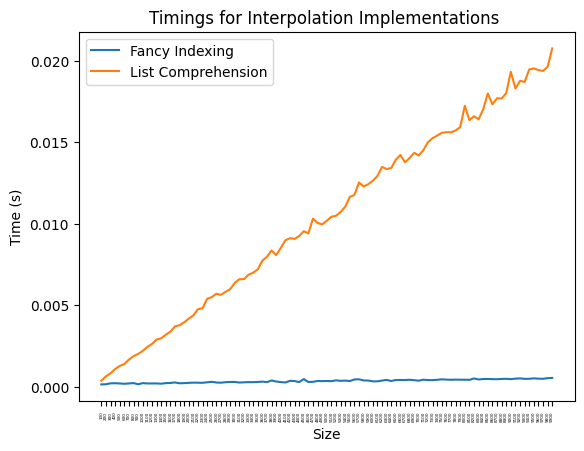

In [10]:
# Plot the results using matplotlib
plt.figure()
for mode in results.keys():
    plt.plot(df.index, df[mode], "-")
plt.title(f"Timings for Interpolation Implementations ")
plt.xlabel("Size")
plt.ylabel("Time (s)")
plt.legend(
    [
        "Fancy Indexing",
        "List Comprehension",
    ]
)
# Rotate the xticks
plt.xticks(rotation=90)
# Smaller font on the xticks
plt.xticks(fontsize=3)

# Save figure high resolution
plt.savefig("./Results/Interpolation/Interpolation Timings.png", dpi=300)

# 4. Linear Regression
Since the data is difficult to read, we can perform a linear regression to get a better idea of the trend.


Linear Regression Indexed List: y = 3.4812e-08x + 0.0002 --> Slope: 3.48119e-08
Linear Regression List Compresion: y = 2.0237e-06x + 0.0003 --> Slope: 2.02374e-06


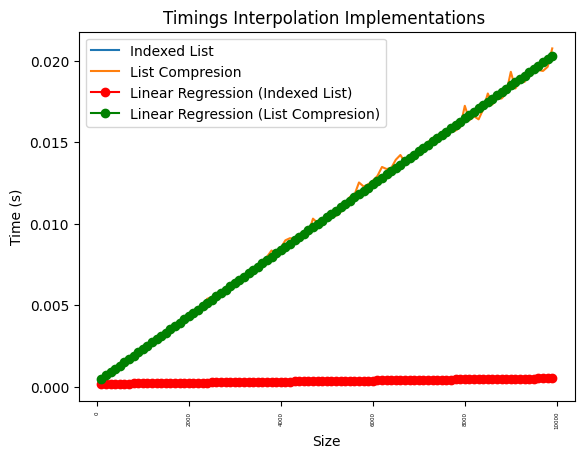

In [11]:
# linear regression
from scipy.stats import linregress

x = np.array(list(map(lambda y: float(y), df.index)))

# Get the slope and intercept of the linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x, df["Indexed List"])
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x, df["List Compresion"])

print(
    f"Linear Regression Indexed List: y = {slope1:.4e}x + {intercept1:.4f} --> Slope: {slope1:.5e}"
)
print(
    f"Linear Regression List Compresion: y = {slope2:.4e}x + {intercept2:.4f} --> Slope: {slope2:.5e}"
)


# Plot the results using matplotlib
plt.figure()
for mode in results.keys():
    plt.plot(x, df[mode], "-", label=mode)


# Plot the linear regression
plt.plot(x, slope1 * x + intercept1, "ro-", label="Linear Regression (Indexed List)")
plt.plot(x, slope2 * x + intercept2, "go-", label="Linear Regression (List Compresion)")

plt.title(f"Timings Interpolation Implementations ")
plt.xlabel("Size")
plt.ylabel("Time (s)")
plt.legend()


# Rotate the xticks
plt.xticks(rotation=90)
# Smaller font on the xticks
plt.xticks(fontsize=4)

# Save figure high resolution
plt.savefig("./Results/Interpolation/Interpolation_Timings_Regression.png", dpi=1000)